## LOAD

In [1]:
model_path = './models/{0}/'.format('all_data')

In [2]:
import os
import numpy as np
import pandas as pd
import warnings
import pickle

from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
main_path = './data/tmp_analysis/{0}'.format('all_data')
main_train_path = main_path + '_train.csv'
main_test_path = main_path + '_test.csv'
main_valid_path = main_path + '_valid.csv'

Train = pd.read_csv(main_train_path)
Test = pd.read_csv(main_test_path)
Valid = pd.read_csv(main_valid_path)

alt_path = './data/tmp_analysis/{0}'.format('alt_all_data')
alt_train_path = alt_path + '_train.csv'
alt_test_path = alt_path + '_test.csv'
alt_valid_path = alt_path + '_valid.csv'

AltTrain = pd.read_csv(main_train_path)
AltTest = pd.read_csv(main_test_path)
AltValid = pd.read_csv(main_valid_path)

In [4]:
X = np.asarray(Train.to_numpy()[:,3:]).astype('float32')

print(X.shape)

X = np.append(X, np.asarray(AltTrain.to_numpy()[:,3:]).astype('float32'), axis=0)
X = np.append(X, np.asarray(AltValid.to_numpy()[:,3:]).astype('float32'), axis=0)

print(X.shape)

(712824, 136)
(1601253, 136)


In [5]:
del Train
del AltTrain
del AltValid

In [6]:
Xtest = np.asarray(Test.to_numpy()[:,3:]).astype('float32')
Xtest = np.append(Xtest, np.asarray(AltTest.to_numpy()[:,3:]).astype('float32'), axis=0)

print(Xtest.shape)

(351120, 136)


In [7]:
del Test
del AltTest

In [8]:
Xvalid = np.asarray(Valid.to_numpy()[:,3:]).astype('float32')

print(Xvalid.shape)

(175605, 136)


In [9]:
del Valid

# Autoencoder
Right now just doing a single layer 
Perhaps we can try a two layer encoder / two layer decoder next?

32 Wide encoder

In [26]:
import keras
from keras import layers

In [27]:
print(X.shape)

(1601253, 136)


In [28]:
input_dim = X.shape[1]
encoding_dim = 32

input_layer = keras.Input(shape=(input_dim,))

encoded_1_layer = layers.Dense(encoding_dim * 2, activation='relu')(input_layer)
encoded_2_layer = layers.Dense(encoding_dim, activation='relu')(encoded_1_layer)

dropout_layer = layers.Dropout(0.5)(encoded_2_layer)

decoded_1_layer = layers.Dense(encoding_dim * 2, activation='relu')(dropout_layer)
decoded_2_layer = layers.Dense(input_dim, activation='selu')(decoded_1_layer)


autoencoder_32 = keras.Model(input_layer,decoded_2_layer)
encoder_32 = keras.Model(input_layer, encoded_2_layer)

In [29]:
autoencoder_32.compile(optimizer='adam',
                    loss='categorical_crossentropy')

In [30]:
autoencoder_32.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 136)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8768      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_12 (Dense)             (None, 136)               8840      
Total params: 21,800
Trainable params: 21,800
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = autoencoder_32.fit(X, X, epochs=3, batch_size=64, verbose=1, validation_data=(Xtest, Xtest), shuffle=True)

Train on 1601253 samples, validate on 351120 samples
Epoch 1/3
1601253/1601253 [==============================] - 390s 244us/step - loss: 494564.9420 - val_loss: 493634.5751
Epoch 2/3
1601253/1601253 [==============================] - 259s 162us/step - loss: 493665.9914 - val_loss: 493627.3087
Epoch 3/3
1601253/1601253 [==============================] - 231s 144us/step - loss: 493644.4731 - val_loss: 493618.0767


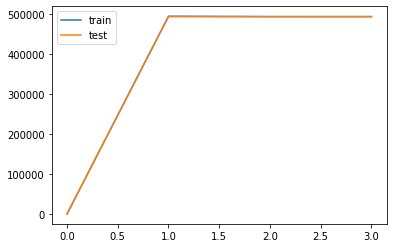

In [32]:
fig, ax = plt.subplots()

plt.plot([0]+history.history['loss'], label='train')
plt.plot([0]+history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [33]:
predictions = autoencoder_32.predict(Xvalid)
# TODO I should probably do something with the validation set

In [34]:
autoencoder_32.save(model_path + 'alt_autoencoder_32.h5')
encoder_32.save(model_path + 'alt_encoder_32.h5')